In [52]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [53]:
# READ THE DATA
gender_data = pd.read_csv("dt_genderdata.csv")

In [54]:
#PRINT ITS SHAPE AND COLUMN NAMES
print(gender_data.shape)
print(gender_data.columns)

(16, 5)
Index(['Unnamed: 0', 'Offense', 'Male', 'Female', 'category'], dtype='object')


In [55]:
#CLEAN THE DATA
#REMOVE THE FIRST COLUMN
gender_data = gender_data.drop(columns=['Unnamed: 0','Offense'])
#CHECK FOR MISSING VALUES
gender_data.isnull().sum()

Male        0
Female      0
category    0
dtype: int64

In [56]:
#SUMMARIZE THE DATA
df_describe = gender_data.describe().loc[['min','mean','max']]
df_dtype = gender_data.dtypes
df_describe = df_describe.append(df_dtype,ignore_index=True)
df_describe = df_describe.rename(index={0:'min',1:'mean',2:'max',3:'dtype'})
df_describe = df_describe.transpose()
print(df_describe)

             min      mean       max   dtype
Male       335.0  138022.5  508037.0   int64
Female    1659.0  119444.0  549220.0   int64
category     NaN       NaN       NaN  object


/var/folders/yc/mphc0tn16cx2tqhspm90bcg80000gn/T/ipykernel_69938/2897756889.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_describe = df_describe.append(df_dtype,ignore_index=True)


In [57]:
#THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH CATEGORY
from locale import normalize

category_male_count = gender_data['category'].value_counts()['Male']
category_female_count = gender_data['category'].value_counts()['Female']
category_male_norm = gender_data['category'].value_counts(normalize = True)['Male']
category_female_norm = gender_data['category'].value_counts(normalize = True)['Female']

print("Number of points with category white: {0:2d} {1:}".format(category_male_count, category_male_norm))
print("Number of points with category black: {0:2d} {1:}".format(category_female_count, category_female_norm))

Number of points with category white: 10 0.625
Number of points with category black:  6 0.375


In [58]:
#MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="category" COLUMN and X="everything else"
X = gender_data.drop(columns = ['category'])
Y = gender_data['category']

In [59]:
#PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.52, random_state=2)

In [60]:
#CONSISTENCY CHECK
print(type(x_train))
print(x_train.shape)
print(type(y_train))
print(y_train.shape)
print(type(x_test))
print(x_test.shape)
print(type(y_test))
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(8, 2)
<class 'pandas.core.series.Series'>
(8,)
<class 'pandas.core.frame.DataFrame'>
(8, 2)
<class 'pandas.core.series.Series'>
(8,)


In [61]:
# TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [62]:
#MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [63]:
#CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix


def confusion_plot(y_data,y_pred):
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='Male')))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='Male')))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='Male')))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='Female')))
    print(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", )
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

------TEST------
ACCURACY: 0.88
NEGATIVE RECALL (Y=0): 0.83
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 0.83
POSITIVE PRECISION (Y=1): 0.67
[[2 0]
 [1 5]]


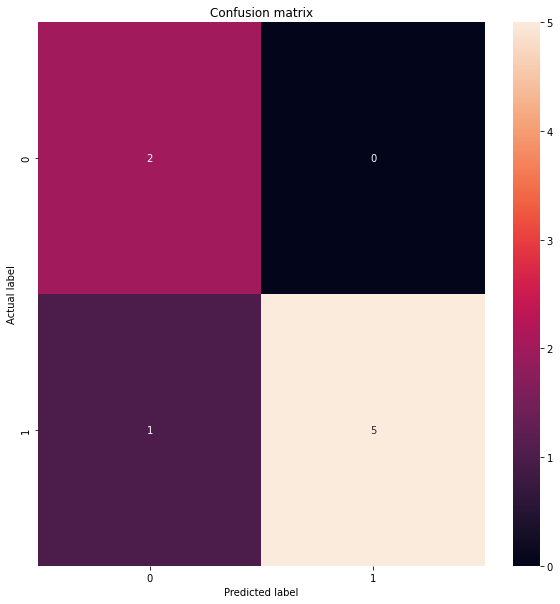

In [64]:
#TEST SET CONFUSION MATRIX
print("------TEST------")
confusion_plot(y_test,yp_test)

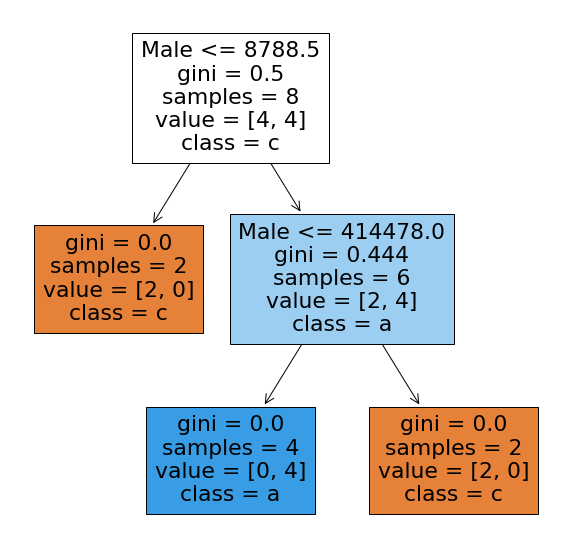

In [65]:
# VISUALIZE THE DECISION TREE 
def plot_tree(model,X,Y):
    plt.figure(figsize=(10,10))
    tree.plot_tree(model, feature_names=X.columns, class_names=Y.name, filled=True)
    plt.show()

plot_tree(model,X,Y)

In [80]:
#HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,17):
    model = tree.DecisionTreeClassifier(max_depth=1)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='Male'),recall_score(y_test, yp_test,pos_label='Female')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='Male'),recall_score(y_train, yp_train,pos_label='Female')])



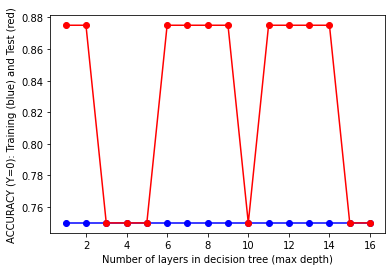

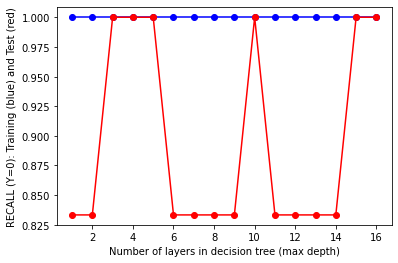

Text(0.5, 0, 'Number of layers in decision tree (max depth)')

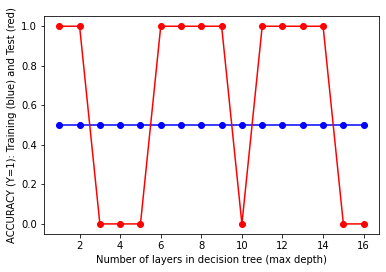

In [81]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# PLOT 1: ACCURACY SCORE
line1, = plt.plot(pd.DataFrame(train_results)[0], pd.DataFrame(train_results)[1], 'b', label="Train Accuracy", marker='o')
line2, = plt.plot(pd.DataFrame(test_results)[0], pd.DataFrame(test_results)[1], 'r', label="Test Accuracy", marker='o')

plt.ylabel("ACCURACY (Y=0): Training (blue) and Test (red)")
plt.xlabel('Number of layers in decision tree (max depth)')
plt.show()


# PLOT 2: RECALL SCORE (Y=0)
line1, = plt.plot(pd.DataFrame(train_results)[0], pd.DataFrame(train_results)[2], 'b', label="Train Recall", marker='o')
line2, = plt.plot(pd.DataFrame(test_results)[0], pd.DataFrame(test_results)[2], 'r', label="Test Recall", marker='o')
plt.ylabel("RECALL (Y=0): Training (blue) and Test (red)")
plt.xlabel('Number of layers in decision tree (max depth)')
plt.show()

# PLOT 3:ACCURACY SCORE FOR CLASS 1
line1, = plt.plot(pd.DataFrame(train_results)[0], pd.DataFrame(train_results)[3], 'b', label="Train Recall", marker='o')
line2, = plt.plot(pd.DataFrame(test_results)[0], pd.DataFrame(test_results)[3], 'r', label="Test Recall", marker='o')
plt.ylabel("ACCURACY (Y=1): Training (blue) and Test (red)")
plt.xlabel('Number of layers in decision tree (max depth)')


In [84]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=6)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TEST------
ACCURACY: 0.88
NEGATIVE RECALL (Y=0): 0.83
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 0.83
POSITIVE PRECISION (Y=1): 0.67
[[2 0]
 [1 5]]


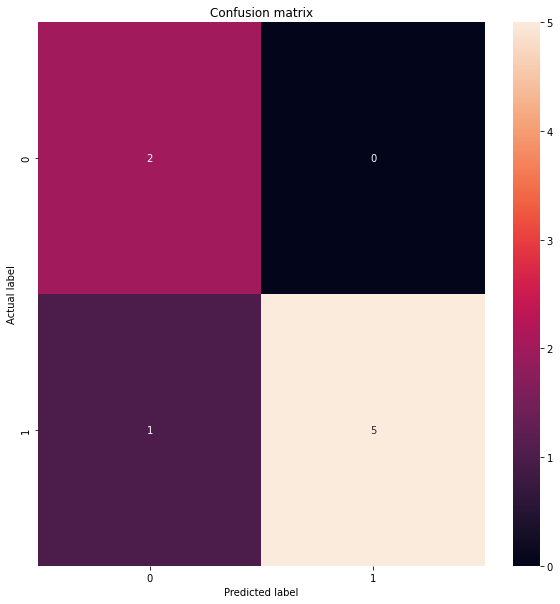

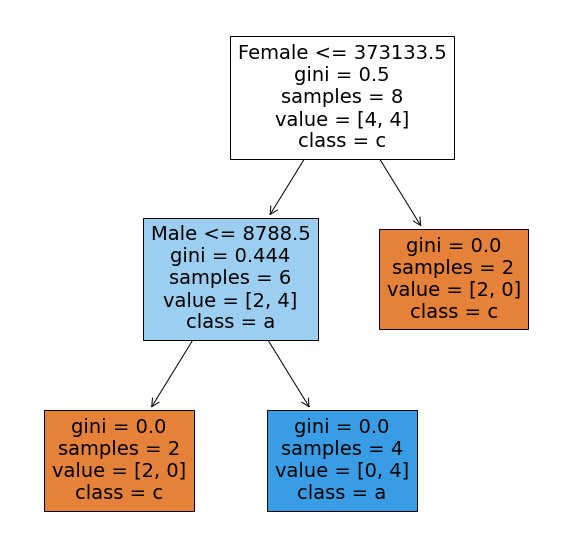

In [85]:
# EVALUATE THE MODEL ON THE TEST SET
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)